In [1]:
!python libraries.py

2024-08-30 17:54:49,066 - INFO - Upgrading pip...
2024-08-30 17:54:49,066 - INFO - Running pip command: install --upgrade pip
2024-08-30 17:54:50,773 - INFO - Command 'install --upgrade pip' executed successfully.
2024-08-30 17:54:50,773 - INFO - pip upgraded successfully.
2024-08-30 17:54:50,773 - INFO - Installing library numpy...
2024-08-30 17:54:50,774 - INFO - Running pip command: install numpy
2024-08-30 17:54:52,273 - INFO - Command 'install numpy' executed successfully.
2024-08-30 17:54:52,273 - INFO - numpy installed successfully.
2024-08-30 17:54:52,274 - INFO - Installing library pandas...
2024-08-30 17:54:52,274 - INFO - Running pip command: install pandas
2024-08-30 17:54:53,885 - INFO - Command 'install pandas' executed successfully.
2024-08-30 17:54:53,885 - INFO - pandas installed successfully.
2024-08-30 17:54:53,885 - INFO - Installing library matplotlib...
2024-08-30 17:54:53,885 - INFO - Running pip command: install matplotlib
2024-08-30 17:54:55,142 - INFO - Comman

In [2]:
import pickle

In [3]:
import os
from config import Config

config = Config(
    data_dir='./data',
    train_data_subdir='train/',
    val_data_subdir='test/',
    test_data_subdir='test/',
    models_dir='./models',
    dl_models_subdir='dl/',
    ml_models_subdir='ml/'
)

data_dir = ['.ipynb_checkpoints', 'features.txt', 'targets.txt', 'test', 'test_file_idx.txt', 'train', 'val']
train_data_dir = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
val_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
test_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
models_dir = ['.ipynb_checkpoints', 'dl', 'ml']
dl_models_dir = ['rnn_model.keras']
ml_models_dir = ['soc_estimation_ml_decisiontree.sav', 'soc_estimation_ml_lregression.sav', 'soc_estimation_ml_nnregression.sav']


In [4]:
import pandas as pd
import numpy as np

## Testing Data

In [5]:
test_file_idx_filename = 'test_file_idx.txt'
test_file_idx_path = os.path.join(config.get_data_dir(), test_file_idx_filename)
with open(test_file_idx_path, 'r') as file:
    test_file_idx = [int(idx.strip()) for idx in file.readlines()]

In [6]:
test_data_filename = os.listdir(config.get_test_data_dir())[test_file_idx[0]]
test_data_path = os.path.join(config.get_test_data_dir(), test_data_filename)
test_data = pd.read_csv(test_data_path)
test_data.columns

Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')

### Extracting Features for Testing

In [7]:
targets_filename = 'targets.txt'
targets_path = os.path.join(config.get_data_dir(), targets_filename)
with open(targets_path, 'r') as file:
    targets = [target.strip() for target in file.readlines()]

features_filename = 'features.txt'
features_path = os.path.join(config.get_data_dir(), features_filename)
with open(features_path, 'r') as file:
    features = [feature.strip() for feature in file.readlines()]

print(f'features = {features}')
print(f'target = {targets}')

features = ['I_avg', 'V_avg', 'Temp', 'I', 'V']
target = ['SOC']


In [8]:
X_test = test_data[features].values
X_test.shape

(47517, 5)

In [9]:
X_test

array([[0.74890031, 0.96696018, 0.92067815, 0.74890031, 0.96696018],
       [0.74794624, 0.96649   , 0.92067726, 0.74699217, 0.96601981],
       [0.74762823, 0.9662938 , 0.91784518, 0.74699223, 0.9659014 ],
       ...,
       [0.75102009, 0.2927976 , 0.9263438 , 0.75102009, 0.29861375],
       [0.75102009, 0.2928344 , 0.92917676, 0.75102009, 0.29861375],
       [0.75102009, 0.29287091, 0.92917676, 0.75102009, 0.29861375]])

### Extracting Target Variable for Testing

In [10]:
y_test = test_data[targets].values
y_test.shape

(47517, 1)

In [11]:
y_test

array([[1.        ],
       [0.99999   ],
       [0.99998333],
       ...,
       [0.13662333],
       [0.13662333],
       [0.13662333]])

## Data Normalization

In [12]:
import utils

In [13]:
normalized_X_test = utils.normalize(X_test)
normalized_X_test

array([[-1.        ,  1.        ,  0.57551079, -1.        ,  1.        ],
       [-0.99130679,  1.        ,  0.58256774, -1.        ,  0.99571585],
       [-0.99419975,  1.        ,  0.55815534, -1.        ,  0.99642139],
       ...,
       [ 0.44653221, -1.        ,  1.        ,  0.44653221, -0.98163938],
       [ 0.44006032, -1.        ,  1.        ,  0.44006032, -0.98183573],
       [ 0.44002819, -1.        ,  1.        ,  0.44002819, -0.98194943]])

# Linear Regression Testing

In [14]:
lregression_model_path = './models/ml/soc_estimation_ml_lregression.sav'
lregression_model = pickle.load(open(lregression_model_path, 'rb'))

In [15]:
y_predicted = lregression_model.predict(normalized_X_test)
y_predicted

array([[1.02063434],
       [1.01863986],
       [1.02061285],
       ...,
       [0.226382  ],
       [0.22738147],
       [0.22736235]])

In [16]:
result = lregression_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.04%


In [17]:
lregression_metrics = utils.get_metrics(y_test, y_predicted)
lregression_metrics

,Metric,Value
0,max_error,0.274250
1,mean_absolute_error,0.087625
2,mean_absolute_percentage_error,0.192088
3,mean_squared_error,0.011751
4,root_mean_squared_error,0.108402
5,root_mean_squared_log_error,0.072723


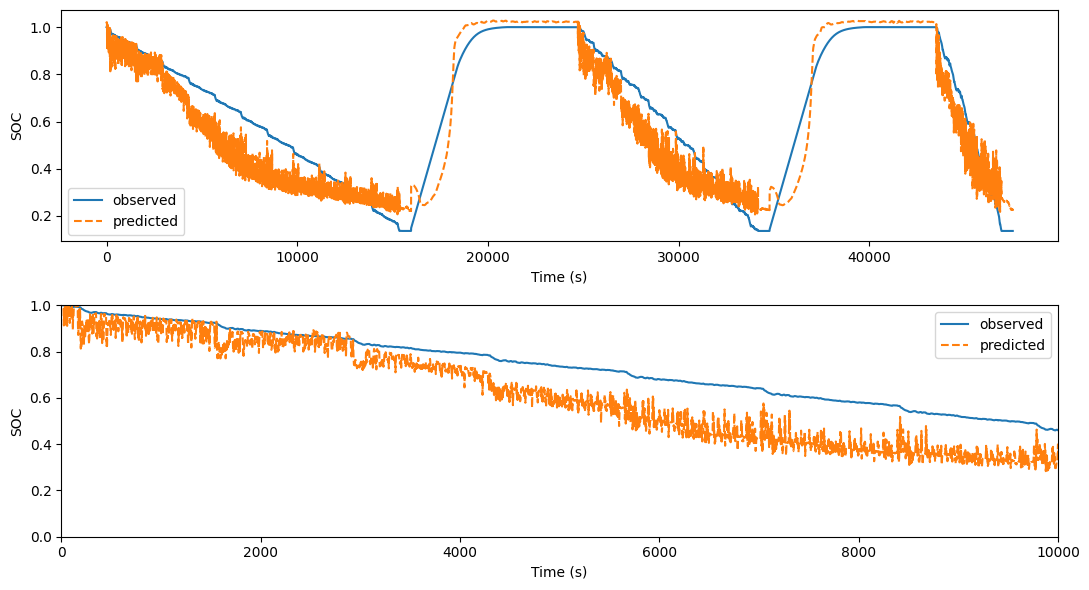

In [18]:
utils.plot_obs_pred(
    y_test=y_test, 
    y_predicted=y_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)

# Decision Tree Testing

In [19]:
decisiontree_model_path = './models/ml/soc_estimation_ml_decisiontree.sav'
decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

In [20]:
y_predicted = decisiontree_model.predict(normalized_X_test)
y_predicted

array([0.99999994, 1.        , 1.        , ..., 0.14728   , 0.14728   ,
       0.14728   ])

In [21]:
result = decisiontree_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.91%


In [23]:
decisiontree_metrics = utils.get_metrics(y_test, y_predicted)
decisiontree_metrics

,Metric,Value
0,max_error,0.292410
1,mean_absolute_error,0.022132
2,mean_absolute_percentage_error,0.064188
3,mean_squared_error,0.001757
4,root_mean_squared_error,0.041920
5,root_mean_squared_log_error,0.031019


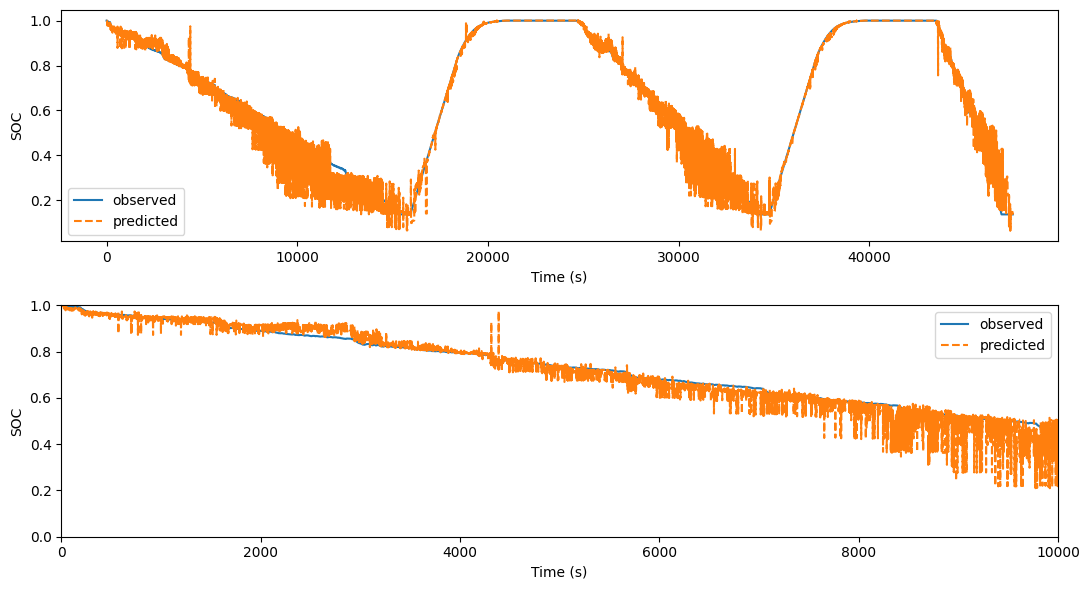

In [24]:
utils.plot_obs_pred(
    y_test=y_test, 
    y_predicted=y_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)

# Nearest Neighbors Regression

In [26]:
nnregression_model_path = './models/ml/soc_estimation_ml_nnregression.sav'
nnregression_model = pickle.load(open(nnregression_model_path, 'rb'))

In [27]:
y_predicted = nnregression_model.predict(normalized_X_test)
y_predicted

array([[1.        ],
       [1.        ],
       [0.99983292],
       ...,
       [0.14728   ],
       [0.20391333],
       [0.20391333]])

In [28]:
result = nnregression_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 98.78%


In [29]:
nnregression_metrics = utils.get_metrics(y_test, y_predicted)
nnregression_metrics

,Metric,Value
0,max_error,0.283471
1,mean_absolute_error,0.018068
2,mean_absolute_percentage_error,0.052475
3,mean_squared_error,0.001030
4,root_mean_squared_error,0.032099
5,root_mean_squared_log_error,0.023617


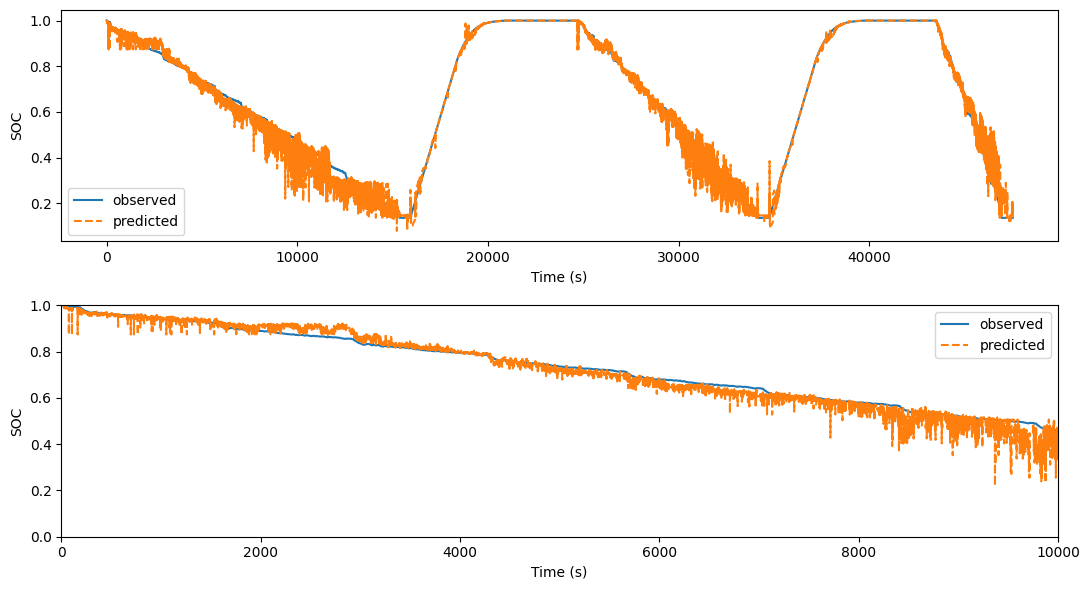

In [30]:
utils.plot_obs_pred(
    y_test=y_test, 
    y_predicted=y_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)